In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
# Change directory to the root of the project
os.chdir('..')  # This moves one directory up
from sklearn.metrics import accuracy_score, classification_report
from models.DecisionTree import DecisionTree

In [2]:
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

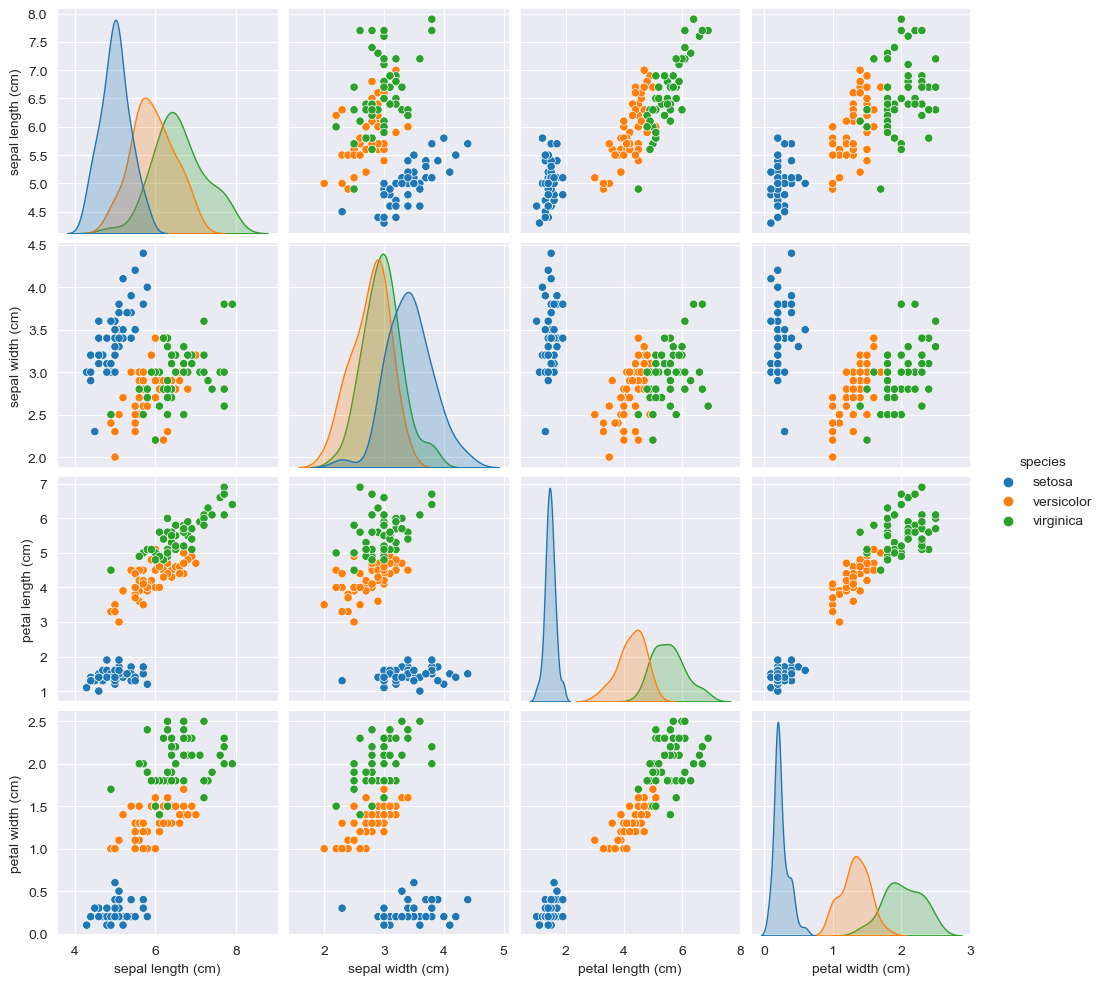

In [3]:
# Convert to DataFrame for easier visualization and exploration
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

# Pair plot to visualize the relationships between features
sns.pairplot(df, hue='species')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
tree = DecisionTree(max_depth=3)
tree.fit(X_train, y_train)

In [5]:
# Predictions on the test set
y_pred = tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Detailed classification report
report = classification_report(y_test, y_pred, target_names=target_names)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)

Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


In [6]:
from sklearn.model_selection import KFold

def cross_validation(X, y, model, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        accuracy = accuracy_score(y_val, y_pred)
        scores.append(accuracy)
    
    return scores

# Running cross-validation
model = DecisionTree(max_depth=3)
scores = cross_validation(X, y, model)
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)

mean_accuracy, std_accuracy

(0.9533333333333334, 0.03399346342395189)